In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import h5py

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [4]:
#Initalize random number generator
import random
random.seed(0)

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
rootDir = '/content/drive/My Drive/AIML Assignments/Neural network/'

In [6]:
h5f = h5py.File(rootDir + 'SVHN_single_grey1.h5','r')

In [7]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [8]:
#Load train and test datasets
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
h5f.close()

In [9]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)
print('Validation data shape:',X_val.shape)

Training data shape: (42000, 32, 32)
Testing data shape: (18000, 32, 32)
Validation data shape: (60000, 32, 32)


In [10]:
print('Training data type:','X train - ', X_train.dtype, ',y train - ', y_train.dtype)
print('Testing data type:','X test - ', X_test.dtype, ',y test - ', y_test.dtype)
print('Validation data type:','X val - ', X_val.dtype, ',y val - ', y_val.dtype)

Training data type: X train -  float32 ,y train -  uint8
Testing data type: X test -  float32 ,y test -  uint8
Validation data type: X val -  float32 ,y val -  uint8


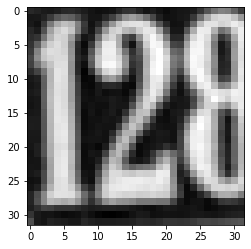

Label:  2


In [11]:
# Show image in train the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

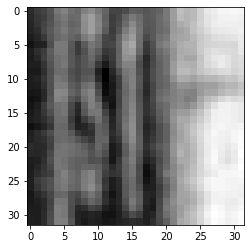

Label:  1


In [12]:
# Show image in train the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

<function matplotlib.pyplot.show>

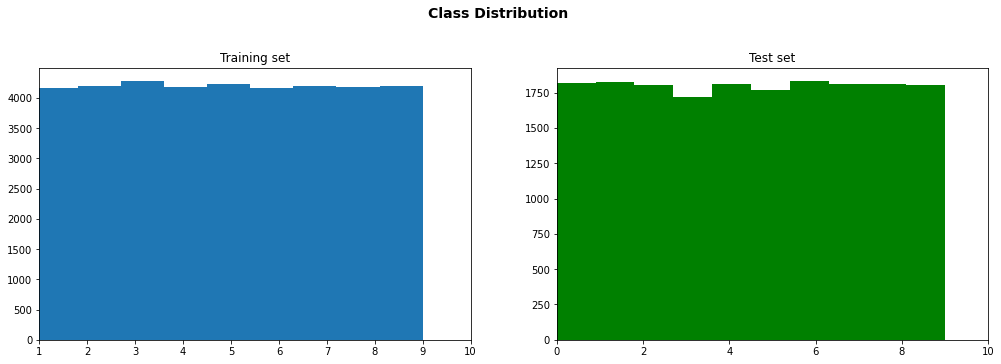

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(17,5))

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")
ax2.set_xlim(0, 10)

plt.show

In [14]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
#Normalizing the data
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_norm = (X_train-X_train_mean)/X_train_std
X_test_mean = np.mean(X_test, axis=0)
X_test_std = np.std(X_test, axis=0)
X_test_norm = (X_test-X_test_mean)/X_test_std

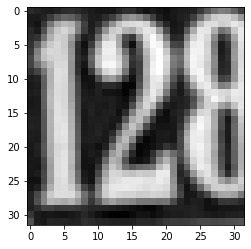

Label:  2


In [16]:
# Printing the first image after normalization
plt.imshow(X_train_norm[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

In [17]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)

In [18]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (42000, 1024)
Testing data shape: (18000, 1024)


In [19]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Test set", y_test.shape)

Training set (42000, 10)
Test set (18000, 10)


**Implementing Neural Network**


In [20]:
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Flatten
from keras import optimizers
import tensorflow as tf

In [21]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [22]:
# Input Layer
#Adding flatten layer 
keras_model.add(Flatten())

#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

**Fixing Learning rate for ADAM optimizer as 0.0001 and the number of 
epochs as 100.**


In [23]:
adam = optimizers.Adam(lr = 0.0001)
# Compiling again
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train_norm, y_train,validation_data=(X_test_norm,y_test),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 17ms/step - loss: 1.9650 - accuracy: 0.3499 - val_loss: 1.5706 - val_accuracy: 0.5344
Epoch 2/100
210/210 [==============================] - 3s 16ms/step - loss: 1.3644 - accuracy: 0.6121 - val_loss: 1.2251 - val_accuracy: 0.6582
Epoch 3/100
210/210 [==============================] - 3s 13ms/step - loss: 1.1215 - accuracy: 0.6897 - val_loss: 1.0621 - val_accuracy: 0.7044
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 0.9935 - accuracy: 0.7255 - val_loss: 0.9750 - val_accuracy: 0.7248
Epoch 5/100
210/210 [==============================] - 3s 13ms/step - loss: 0.9085 - accuracy: 0.7471 - val_loss: 0.9139 - val_accuracy: 0.7398
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 0.8412 - accuracy: 0.7666 - val_loss: 0.8652 - val_accuracy: 0.7524
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 0.7912 - accuracy: 0.7805 - val_loss: 0.8304 - val_accuracy:

In [24]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (200, 1024)               0         
_________________________________________________________________
dense (Dense)                (200, 512)                524800    
_________________________________________________________________
activation (Activation)      (200, 512)                0         
_________________________________________________________________
dense_1 (Dense)              (200, 10)                 5130      
_________________________________________________________________
activation_1 (Activation)    (200, 10)                 0         
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


We have a accuracy of 96.60% with the training dataset. Now we can check the results with the testing dataset.

In [25]:
results = keras_model.evaluate(X_test_norm, y_test)
print('Test accuracy : ', results[1])
print('Test Loss : ', results[0])

563/563 [==============================] - 1s 3ms/step - loss: 0.5635 - accuracy: 0.8591
Test accuracy :  0.8590555787086487
Test Loss :  0.563546359539032


The test accuracy of the model is 0.8569 with the Adam optimizer with a loss of 0.5677. This can be further increased by introducing new layers along with Batch normalization, dropuouts etc..